In [1]:
# Imports
from biocrnpyler import *
from genelet import *
import pylab as plt
import numpy as np
from bokeh.layouts import row
from bokeh.io import export_png

import warnings
import bokeh.io
import bokeh.plotting

C:\Users\Jeremiah\anaconda3\lib\site-packages\biocrnpyler-0.2.1-py3.7.egg\biocrnpyler\__init__.py:37: UserWarning: No module named 'fa2'
C:\Users\Jeremiah\anaconda3\lib\site-packages\biocrnpyler-0.2.1-py3.7.egg\biocrnpyler\__init__.py:38: UserWarning: plotting is disabled because you are missing some libraries


## CRN ##
## For bistable switch ##
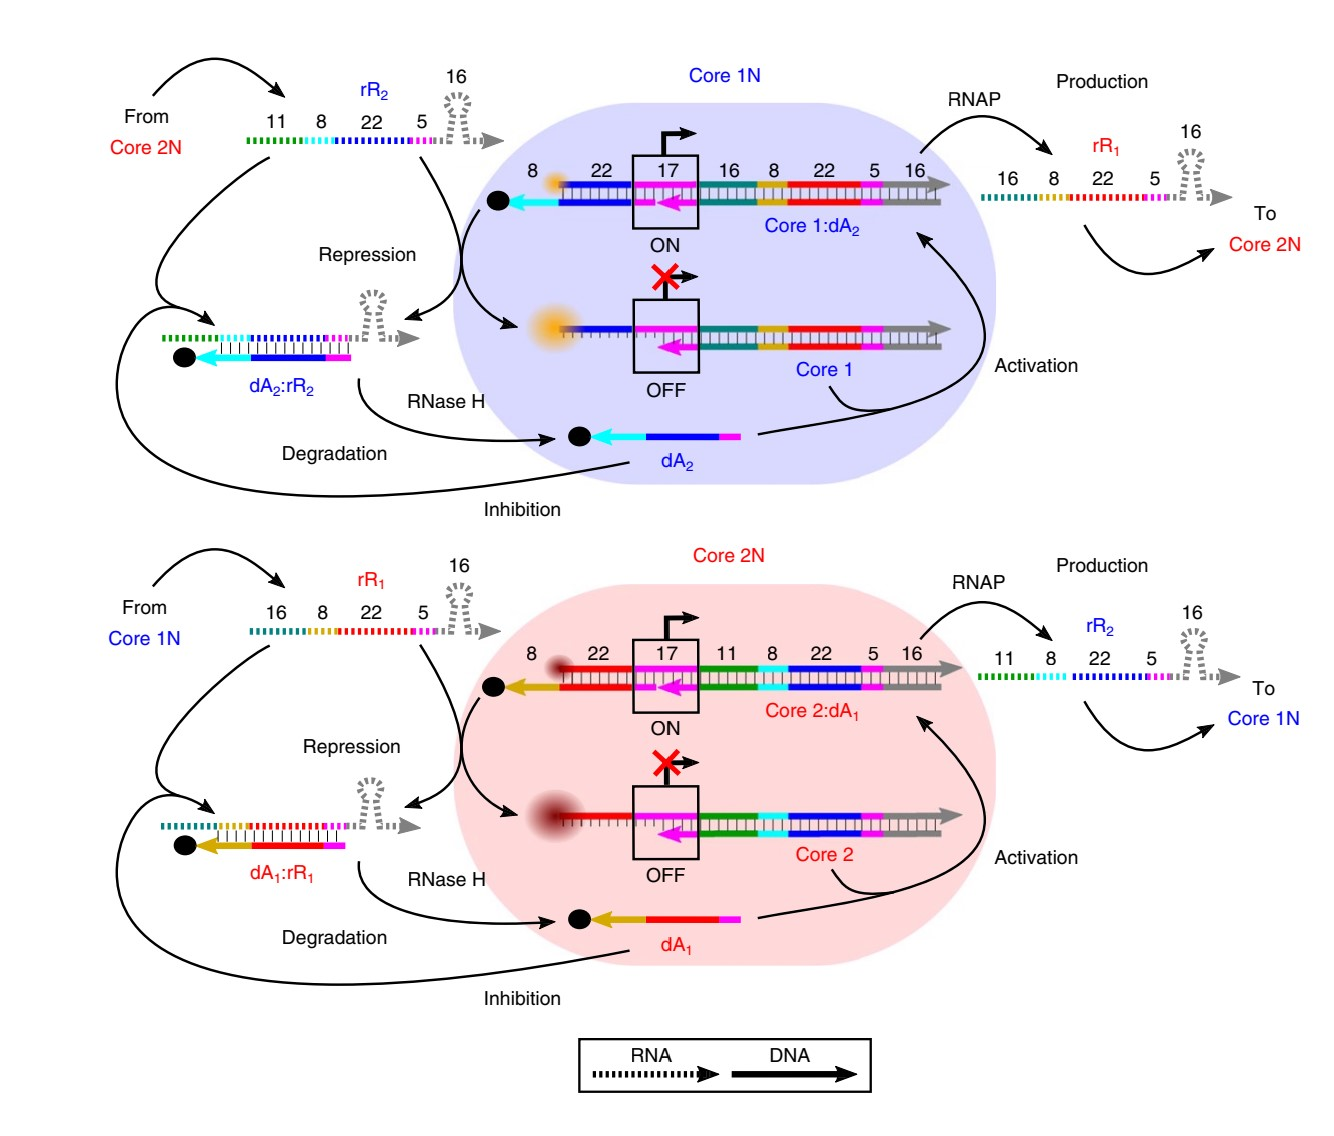

In [2]:
# Create CRN for bistable switch
Core1_off = Species ("Core1")
Core2_off = Species ("Core2")
rR1 = Species ("rR1")
rR2 = Species ("rR2")
dA1 = Species ("dA1")
dA2 = Species ("dA2")

Core1 = Genelet(Core1_off, transcript = rR1, activator = dA2, inhibitor = rR2 )
Core2 = Genelet(Core2_off, transcript = rR2, activator = dA1, inhibitor = rR1 )
M_BiSwitch = Mixture(name = "Switch_test", components = [Core1, Core2], parameter_file = "default_parameters.txt")
repr(M_BiSwitch)
CRN_BiSwitch = M_BiSwitch.compile_crn()

print(CRN_BiSwitch.pretty_print())

Species (18) = {0. Core1_OFF, 1. complex[Core1_OFF:dA2], 2. rR1, 3. dA2, 4. rR2, 5. protein[RNAP], 6. protein[RNAseH], 7. complex[rR2:dA2], 8. complex[complex[Core1_OFF:dA2]:protein[RNAP]], 9. complex[Core1_OFF:protein[RNAP]], 10. complex[complex[rR2:dA2]:protein[RNAseH]], 11. Core2_OFF, 12. complex[dA1:Core2_OFF], 13. dA1, 14. complex[dA1:rR1], 15. complex[complex[dA1:Core2_OFF]:protein[RNAP]], 16. complex[Core2_OFF:protein[RNAP]], 17. complex[complex[dA1:rR1]:protein[RNAseH]]}
Reactions (18) = [
0. Core1_OFF + dA2 --> complex[Core1_OFF:dA2]        
        massaction: k_f(Core1_OFF,dA2)=0.00394*Core1_OFF*dA2
1. complex[Core1_OFF:dA2] + rR2 --> Core1_OFF + complex[rR2:dA2]        
        massaction: k_f(complex[Core1_OFF:dA2],rR2)=0.0696*complex[Core1_OFF:dA2]*rR2
2. dA2 + rR2 --> complex[rR2:dA2]        
        massaction: k_f(dA2,rR2)=0.0696*dA2*rR2
3. complex[Core1_OFF:dA2] + protein[RNAP] <--> complex[complex[Core1_OFF:dA2]:protein[RNAP]]        
        massaction: k_f(complex[

#  Simulations Bistable Switch #

## Cores OFF w/ one higher concentration ##

In [9]:
# Bioscrape simulation for code above 

io = {"Core1_OFF": 6000, "dA2": 6000, "rR2": 0, "Core2_OFF": 5000, "dA1": 6000, "rR1": 0, "protein_RNAseH":20,
      "protein_RNAP":150}
timepoints = np.linspace(0, 28800, 1000)
R = CRN_BiSwitch.simulate_with_bioscrape(timepoints, initial_condition_dict = io)
# For label convenience
x = 'Time (seconds)'
y = 'Concentration (uM)'

# Core 1 concentration/molecules
bokeh.io.output_notebook()
a = bokeh.plotting.figure(plot_width=400, plot_height=300, x_axis_label = x, y_axis_label = y)
a.circle(timepoints, R["Core1_OFF"], legend_label = "OFF Core 1", color = "blue")
a.circle(timepoints, R["complex_Core1_ON"], legend_label = "ON Core 1", color = "red")
a.legend.click_policy="hide"


# Core 2 concentration/molecules
b = bokeh.plotting.figure(plot_width=400, plot_height=300,  x_axis_label = x, y_axis_label = y)
b.circle(timepoints, R["Core2_OFF"], legend_label = "OFF Core 2", color = "darkblue")
b.circle(timepoints, R["complex_Core2_ON"], legend_label = "ON Core 2" , color = "darkred")
b.legend.click_policy="hide"

r = bokeh.plotting.figure(plot_width=400, plot_height=300,  x_axis_label = x, y_axis_label = y)
r.circle(timepoints, R["complex_Core1_AI"], legend_label = "AI", color = "darkblue")


bokeh.io.show(row(a, b, r))
warnings.filterwarnings("ignore")


odeint failed with mxstep=500...

Loading BokehJS ...

**Observations**
Both Cores turned off. 
Core 1's initial concentration is 1000 uM higher than Core 2.
Core 2 is comeplete shut OFF and overwhelmed by Core 1. 
Around 1000 uM of core 1 stays ON.
Bistability exhibited toward end of simulation.

In [10]:
# Repressors rRi for simulation above

c = bokeh.plotting.figure(plot_width=400, plot_height=300, x_axis_label = x, y_axis_label = y)
c.circle(timepoints, R["rR1"], legend_label = "RNA #1", color = "red")
c.legend.location = "top_left"
d = bokeh.plotting.figure(plot_width=400, plot_height=300, x_axis_label = x, y_axis_label = y)
d.circle(timepoints, R["rR2"], legend_label = "RNA #2", color = "blue")

bokeh.io.show(row(c,d))
warnings.filterwarnings("ignore")

## Core 1 ON w/ higher concentration and Core 2 OFF ##

In [5]:
# Bioscrape simulation with one core ON and other core OFF

io = {"complex_Core1_ON": 5000, "dA2":6000, "rR2": 0, "Core2_OFF": 5000, "dA1": 6000, "rR1": 0, "protein_RNAseH":10,
      "protein_RNAP":150}
timepoints = np.linspace(0, 5000, 1000)
R = CRN_BiSwitch.simulate_with_bioscrape(timepoints, initial_condition_dict = io)

# For label convenience
x = 'Time (seconds)'
y = 'Concentration (uM)'

# Core 1 concentration/molecules
bokeh.io.output_notebook()
g = bokeh.plotting.figure(plot_width=400, plot_height=300, x_axis_label = x, y_axis_label = y)
g.circle(timepoints, R["complex_Core2_ON"], legend_label = "ON Core 2", color = "red")
g.circle(timepoints, R["complex_Core1_ON"], legend_label = "ON Core 1", color = "blue")
g.legend.click_policy="hide"
g.legend.location = "center_right"

i = bokeh.plotting.figure(plot_width=400, plot_height=300, x_axis_label = x, y_axis_label = y)
i.circle(timepoints, R["rR1"], legend_label = "rR1", color = "red")
i.legend.click_policy="hide"
i.legend.location = "center_right"

j = bokeh.plotting.figure(plot_width=400, plot_height=300, x_axis_label = x, y_axis_label = y)
j.circle(timepoints, R["rR2"], legend_label = "rR2", color = "blue")

bokeh.io.show(row(g, i, j))
warnings.filterwarnings("ignore")


odeint failed with mxstep=500...

Loading BokehJS ...

**Observations**

Initially, Core 1 is ON, and Core 2 is OFF.
Timing is under 8 hours.
Core 2 is turned ON and overtime completely turned OFF and overwhelmed by Core 1.
Excess of rR1, just like Schaffter and Schulman predicted in their own papers.
rR2 is constantly at 0? Not sure why. Maybe the amount is incredibly small compared to rR1. Or Maybe because Core 2 is being repressed.

*After separating rRi graphs*

rR2 incredibly small. Hits 0.001?

## Attempt to add rR2 into the system to see switch ##

In [6]:
io = {"complex_Core1_ON": 5000, "dA2":6000, "rR2": 0, "Core2_OFF": 5000, "dA1": 6000, "rR1": 0, "protein_RNAseH":10,
      "protein_RNAP":150}
timepoints = np.linspace(0, 5000, 1000)
R = CRN_BiSwitch.simulate_with_bioscrape(timepoints, initial_condition_dict = io)
# For label convenience
x = 'Time (seconds)'
y = 'Concentration (uM)'

odeint failed with mxstep=500...

def add_rR2(io):
    """Adds rR2 at time 1800 seconds
    meant to show bistability by
    turning Core1 OFF"""
    
    if timepoints = np.linspace (0, 1800, 1000)
        return io = {"rR2": 5000}

In [7]:
# Core 1 concentration/molecules
bokeh.io.output_notebook()
h = bokeh.plotting.figure(plot_width=400, plot_height=300, x_axis_label = x, y_axis_label = y)
h.circle(timepoints, R["complex_Core2_ON"], legend_label = "ON Core 2", color = "red")
h.circle(timepoints, R["complex_Core1_ON"], legend_label = "ON Core 1", color = "blue")
h.legend.click_policy="hide"
h.legend.location = "center_right"

m = bokeh.plotting.figure(plot_width=400, plot_height=300, x_axis_label = x, y_axis_label = y)
m.circle(timepoints, R["rR1"], legend_label = "rR1", color = "red")
m.legend.click_policy="hide"
m.legend.location = "center_right"

n = bokeh.plotting.figure(plot_width=400, plot_height=300, x_axis_label = x, y_axis_label = y)
n.circle(timepoints, R["rR2"], legend_label = "rR2", color = "blue")

bokeh.io.show(row(h, m, n))
warnings.filterwarnings("ignore")

Loading BokehJS ...